Issues with outliers
---

In [2]:
import pandas as pd

data_df = pd.read_csv('marketing-outliers.csv')
data_df.shape

(55, 4)

In [3]:
# Last five data points
data_df.tail()

,tv,web,radio,sales
50,2.293,2.314,1.167,8.937
51,2.891,1.895,1.365,8.132
52,1.305,1.940,1.454,8.892
53,11.022,1.855,1.282,1.389
54,11.786,2.066,1.466,1.623


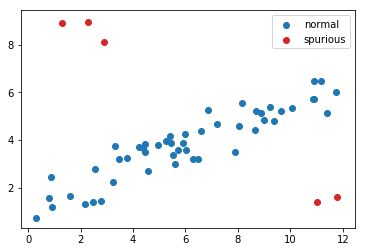

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extract tv and sales
x = data_df.tv.values
y = data_df.sales.values

# Plot the data points
plt.scatter(x[:-5], y[:-5], label='normal')
plt.scatter(x[-5:], y[-5:], c='C3', label='spurious')
plt.legend()
plt.show()

In [5]:
import numpy as np

# Fit a linear regression
coefs = np.polyfit(x, y, deg=1)
print('coefs:', coefs)

# Fit a linear regression without the 5 outliers
coefs_wo = np.polyfit(x[:-5], y[:-5], deg=1)
print('coefs without outliers:', coefs_wo)

coefs: [0.20613307 2.76540858]
coefs without outliers: [0.42063597 1.27867727]


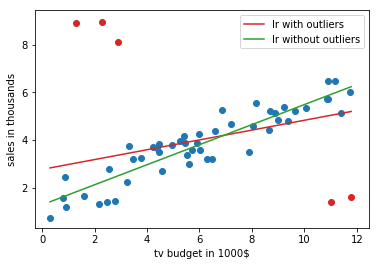

In [6]:
# Compute prediction line
x_values = np.linspace(min(x), max(x), num=100)
y_values = np.polyval(coefs, x_values)
y_values_wo = np.polyval(coefs_wo, x_values)

# Plot them
plt.scatter(x[:-5], y[:-5])
plt.scatter(x[-5:], y[-5:], c='C3')
plt.plot(x_values, y_values, c='C3', label='lr with outliers')
plt.plot(x_values, y_values_wo, c='C2', label='lr without outliers')
plt.xlabel('tv budget in 1000$')
plt.ylabel('sales in thousands')
plt.legend()
plt.show()

In [7]:
# Compute predictions for all data points
y_pred = np.polyval(coefs, x)

# Compute the squares of residuals
squares_residuals = np.square(y - y_pred)

print('RSS normal points:', np.sum(squares_residuals[:-5]))
print('RSS outliers:', np.sum(squares_residuals[-5:]))

RSS normal points: 39.53376462337348
RSS outliers: 115.61761647921122


Remove outliers by hand
---

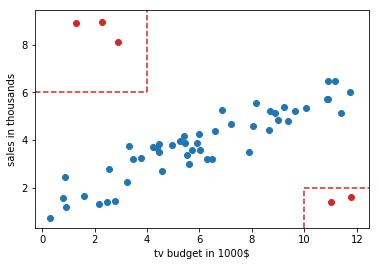

In [8]:
# Remove two regions
plt.scatter(x[:-5], y[:-5])
plt.scatter(x[-5:], y[-5:], c='C3')

# Draw squares around those regions
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.hlines(y=6, xmin=xmin, xmax=4, color='C3', linestyle='--')
plt.vlines(x=4, ymin=6, ymax=ymax, color='C3', linestyle='--')
plt.hlines(y=2, xmin=10, xmax=xmax, color='C3', linestyle='--')
plt.vlines(x=10, ymin=ymin, ymax=2, color='C3', linestyle='--')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Add labels
plt.xlabel('tv budget in 1000$')
plt.ylabel('sales in thousands')
plt.show()

In [9]:
# Select outliers
idx = (((x < 4) & (y > 6)) | ((x > 10) & (y < 2)))

In [10]:
x < 4

array([ True, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False])

In [11]:
y > 6

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False])

In [12]:
# Points in the upper left corner
(x < 4) & (y > 6)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False])

In [13]:
try:
    # This is an invalid expression!
    x < 4 & y > 6 # equivalent to (x < (4 & y)) > 6
except TypeError:
    print('Type error!')

Type error!


In [14]:
# Points in the lower right corner
(x > 10) & (y < 2)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True])

In [15]:
# Points in the upper left or lower right corners
idx = (((x < 4) & (y > 6)) | ((x > 10) & (y < 2)))
idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True])

In [16]:
# Extract "normal" points
x1, y1 = x[~idx], y[~idx]
print('x1/y1:', x1.shape, y1.shape)

# Extract outliers
x2, y2 = x[idx], y[idx]
print('x2/y2:', x2.shape, y2.shape)

x1/y1: (50,) (50,)
x2/y2: (5,) (5,)


In [17]:
# "normal" points
~idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False])

Standard scores
---

In [19]:
# Compute z-scores
z_scores = (y - y.mean()) / y.std()

print('z-scores:', z_scores.shape) # (55,)

z-scores: (55,)


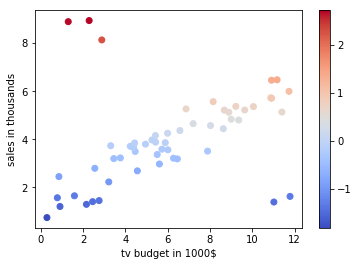

In [20]:
# Plot z-scores
plt.scatter(x, y, c=z_scores, cmap='coolwarm')
plt.xlabel('tv budget in 1000$')
plt.ylabel('sales in thousands')
plt.colorbar()
plt.show()

In [21]:
# Select outliers
idx = (np.abs(z_scores) > 2)
idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False])

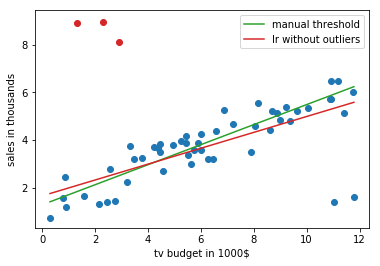

In [22]:
# Fit linear regression
coefs_z = np.polyfit(x[~idx], y[~idx], deg=1)

# Prediction line
y_values_zscore = np.polyval(coefs_z, x_values)

# Final comparison
plt.scatter(x[~idx], y[~idx])
plt.scatter(x[idx], y[idx], c='C3')
plt.plot(x_values, y_values_wo, c='C2', label='manual threshold')
plt.plot(x_values, y_values_zscore, c='C3', label='lr without outliers')
plt.xlabel('tv budget in 1000$')
plt.ylabel('sales in thousands')
plt.legend()
plt.show()